In [2]:
import json
import random
import pandas as pd
from tqdm import tqdm
from web3 import Web3
import time
import numpy as np
import matplotlib.cbook as cbook
import matplotlib.pyplot as plt


In [4]:
#connecting to blockchain(Ganache)
web3 = Web3(Web3.HTTPProvider('HTTP://127.0.0.1:7545'))
print(web3.isConnected())

True


In [68]:
accounts_list = web3.eth.accounts
GRID_accounts = {}

#Making Dictionary
for i in range(1,len(accounts_list)):
    GRID_accounts['A'+str(i)] = accounts_list[i]
GRID_accounts

{'A1': '0x5e48d4446028bbBD50558cB8aBE085Bb403f9911',
 'A2': '0x8730A8e30310809Ed2B9088B37a6F461Adb579f7',
 'A3': '0xaF962F5867E9e206d92d60b99ce047f96E64C4C5',
 'A4': '0x678A0BC3FC1E620c34Dfc14279A80CAD1B956542'}

In [88]:
#latest block height
current_height = web3.eth.getBlock('latest').number
print(current_height)

1046


# Plots

### 1. Amount of Gas Spent

#### 1.1. Deploying Contract

In [161]:
transaction_migrate_gasUsed = web3.eth.getBlock(1)['gasUsed']
transaction_firstContract_gasUsed = web3.eth.getBlock(3)['gasUsed']
transaction_secondContract_gasUsed = web3.eth.getBlock(5)['gasUsed']

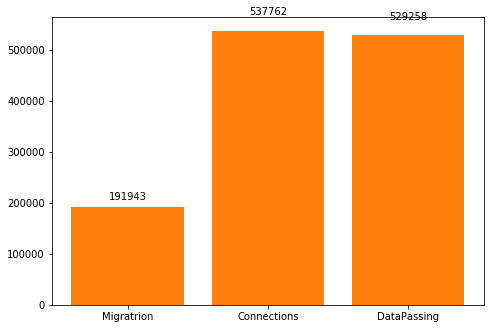

In [162]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bar_tick_label = ['Migratrion', 'Connections', 'DataPassing']
langs = ['Migratrion', 'Connections', 'DataPassing']
students = [transaction_migrate_gasUsed,transaction_firstContract_gasUsed,transaction_secondContract_gasUsed]
bar_plot = plt.bar(langs,students,tick_label=bar_tick_label)
bar_label = students

def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=0)
        
autolabel(students)

ax.bar(langs,students)
plt.show()

#### 1.2. Making Transactions

In [164]:
gas_spent_A1 = [web3.eth.getBlock(i)['gasUsed'] for i in range(1,current_height) if (web3.eth.getTransaction(web3.eth.getBlock(i)['transactions'][0])['from']==GRID_accounts['A1'])]
gas_spent_A2 = [web3.eth.getBlock(i)['gasUsed'] for i in range(1,current_height) if (web3.eth.getTransaction(web3.eth.getBlock(i)['transactions'][0])['from']==GRID_accounts['A2'])]
gas_spent_A3 = [web3.eth.getBlock(i)['gasUsed'] for i in range(1,current_height) if (web3.eth.getTransaction(web3.eth.getBlock(i)['transactions'][0])['from']==GRID_accounts['A3'])]
gas_spent_A4 = [web3.eth.getBlock(i)['gasUsed'] for i in range(1,current_height) if (web3.eth.getTransaction(web3.eth.getBlock(i)['transactions'][0])['from']==GRID_accounts['A4'])]

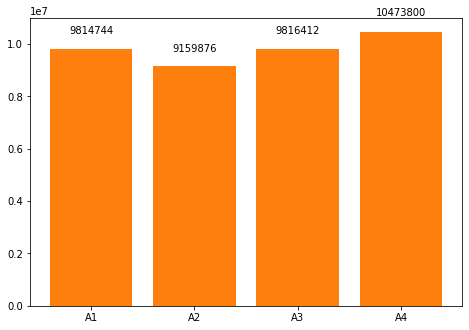

In [165]:
#plotting Total spending
gas_spent_A1_total = sum(gas_spent_A1)
gas_spent_A2_total = sum(gas_spent_A2)
gas_spent_A3_total = sum(gas_spent_A3)
gas_spent_A4_total = sum(gas_spent_A4)

total_gas_per_grid = [gas_spent_A1_total,gas_spent_A2_total,gas_spent_A3_total,gas_spent_A4_total]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bar_tick_label = ['A1', 'A2', 'A3', 'A4']
langs = ['A1', 'A2', 'A3', 'A4']
students = total_gas_per_grid
bar_plot = plt.bar(langs,students,tick_label=bar_tick_label)
bar_label = students

def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=0)
        
autolabel(students)

ax.bar(langs,students)
plt.show()

In [166]:
gas_spent_A1_per_tx = [(gas_spent_A1[i] + gas_spent_A1[i+1]) for i in range(0,len(gas_spent_A1),2)]
gas_spent_A2_per_tx = [(gas_spent_A2[i] + gas_spent_A2[i+1]) for i in range(0,len(gas_spent_A2),2)]
gas_spent_A3_per_tx = [(gas_spent_A3[i] + gas_spent_A3[i+1]) for i in range(0,len(gas_spent_A3),2)]
gas_spent_A4_per_tx = [(gas_spent_A4[i] + gas_spent_A4[i+1]) for i in range(0,len(gas_spent_A4),2)]

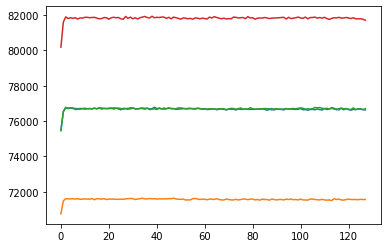

In [169]:
#plot of gas spent per transaction
first = gas_spent_A1_per_tx
second = gas_spent_A2_per_tx
third = gas_spent_A3_per_tx
fourth = gas_spent_A4_per_tx


plt.plot(first)
plt.plot(second)
plt.plot(third)
plt.plot(fourth)
plt.show()

In [170]:
gas_spent_A1_per_tx
#curve because there is little gas spent

[75464,
 76532,
 76772,
 76736,
 76748,
 76712,
 76712,
 76700,
 76712,
 76712,
 76724,
 76700,
 76700,
 76688,
 76736,
 76688,
 76748,
 76736,
 76712,
 76712,
 76712,
 76712,
 76748,
 76736,
 76688,
 76640,
 76724,
 76712,
 76664,
 76760,
 76736,
 76700,
 76688,
 76712,
 76748,
 76676,
 76724,
 76688,
 76700,
 76784,
 76712,
 76712,
 76688,
 76736,
 76700,
 76736,
 76712,
 76712,
 76664,
 76676,
 76688,
 76700,
 76700,
 76688,
 76712,
 76700,
 76712,
 76712,
 76712,
 76664,
 76712,
 76652,
 76664,
 76688,
 76688,
 76640,
 76676,
 76688,
 76664,
 76652,
 76688,
 76664,
 76676,
 76628,
 76688,
 76664,
 76664,
 76688,
 76664,
 76664,
 76664,
 76664,
 76676,
 76676,
 76688,
 76664,
 76616,
 76652,
 76712,
 76628,
 76688,
 76664,
 76664,
 76628,
 76712,
 76676,
 76688,
 76664,
 76664,
 76664,
 76712,
 76640,
 76652,
 76616,
 76652,
 76664,
 76640,
 76688,
 76652,
 76628,
 76712,
 76652,
 76688,
 76760,
 76724,
 76640,
 76700,
 76736,
 76640,
 76712,
 76652,
 76616,
 76664,
 76652,
 76688,


### Mean and stdDiv plot

In [241]:

'''
These are two functions which will be used to establish/destablish connection between GRID,
based on this we will add/remove connection in GRID)connections e.g. A1-A2, A1-A3, etc.

And also it will be used to transact on the blockchain, which will record the connections and disconnections
'''

def establish_connection(from_,to_):
    #adding connections to GRID_connections set.
    try:
        GRID_connections.add(from_ +'-'+ to_)
        #Interacting with blockchain to transact (enableConnections).
        contract_MappingAddressConnection.functions.enableConnections(from_,to_).transact({'from':accounts_list[0]})
        return "Connection Establihed"
    except :
        return "Connection Already Exists"
        #later try except Exception as error to read from response

def destablish_connection(from_,to_):
    #removing connections from GRID_connections set.

    try:
        GRID_connections.remove(from_ +'-'+ to_)
        #Interacting with blockchain to transact.
        contract_MappingAddressConnection.functions.disableConnections(from_,to_).transact({'from':accounts_list[0]})
        return "Connection Destablished"
    except :
        return "No connection exists to disconnect"

def dataFrame_to_Dict(data):
    #data_dictionary = {}
    data_list = []
    for i,j in data.iteritems():
        dict_j = []
        for z in j:
            dict_j.append(str(z))
        #data_dictionary[str(i)] = dict_j
        data_list.append(dict_j)
    #return data_dictionary
    return data_list

def data_transaction(sender,receiver,iteration,amount):
        #print(sender,receiver,iteration,amount)
        try:
            contract_passingArbitraryArguments.functions.passingValues(sender,receiver,iteration,amount).transact({'from':sender})
            return "OKo!"
        except:
            return "No connection"

In [232]:
all_iteration_mean = []
all_iteration_std_div = []

In [258]:
#max_iteration = [0,1,7,15,31,63,127]
max_iteration_number = 127

In [259]:

#Establising Connections on blockchain

accounts_list = web3.eth.accounts

#from index 1 to index 4, they will represent each GRID, so mapping them to regions A1, A2, A3, A4 resp.
GRID_accounts = {}
GRID_connections = set()

#Making Dictionary
for i in range(1,len(accounts_list)):
    GRID_accounts['A'+str(i)] = accounts_list[i]

#First CONTRACT Deployment
with open('build/contracts/MappingAddressConnection.json') as f:
  first_migration = json.load(f)

first_migration_contract_address = first_migration['networks']['5777']['address']
first_migration_abi = first_migration['abi']
contract_MappingAddressConnection = web3.eth.contract(address=first_migration_contract_address, abi = first_migration_abi)

#Adding connections
establish_connection(GRID_accounts['A1'],GRID_accounts['A2'])
establish_connection(GRID_accounts['A1'],GRID_accounts['A3'])
establish_connection(GRID_accounts['A2'],GRID_accounts['A1'])
establish_connection(GRID_accounts['A2'],GRID_accounts['A4'])
establish_connection(GRID_accounts['A3'],GRID_accounts['A1'])
establish_connection(GRID_accounts['A3'],GRID_accounts['A4'])
establish_connection(GRID_accounts['A4'],GRID_accounts['A2'])
establish_connection(GRID_accounts['A4'],GRID_accounts['A3'])

A1_A2 = pd.read_csv('../Seperated_Excel_WD/A1_A2.csv', header=None)
A1_A3 = pd.read_csv('../Seperated_Excel_WD/A1_A3.csv', header=None)
A2_A1 = pd.read_csv('../Seperated_Excel_WD/A2_A1.csv', header=None)
A2_A4 = pd.read_csv('../Seperated_Excel_WD/A2_A4.csv', header=None)
A3_A1 = pd.read_csv('../Seperated_Excel_WD/A3_A1.csv', header=None)
A3_A4 = pd.read_csv('../Seperated_Excel_WD/A3_A4.csv', header=None)
A4_A2 = pd.read_csv('../Seperated_Excel_WD/A4_A2.csv', header=None)
A4_A3 = pd.read_csv('../Seperated_Excel_WD/A4_A3.csv', header=None)

#Importing CSV
#interating through data and putting in dictionary
data_A1_A2 = dataFrame_to_Dict(A1_A2)
data_A1_A3 = dataFrame_to_Dict(A1_A3)
data_A2_A1 = dataFrame_to_Dict(A2_A1)
data_A2_A4 = dataFrame_to_Dict(A2_A4)
data_A3_A1 = dataFrame_to_Dict(A3_A1)
data_A3_A4 = dataFrame_to_Dict(A3_A4)
data_A4_A2 = dataFrame_to_Dict(A4_A2)
data_A4_A3 = dataFrame_to_Dict(A4_A3)

#Data connection set:
GRID_Connections = {'A1_A2' : data_A1_A2,
                    'A1_A3' : data_A1_A3,
                    'A2_A1' : data_A2_A1,
                    'A2_A4' : data_A2_A4,
                    'A3_A1' : data_A3_A1,
                    'A3_A4' : data_A3_A4,
                    'A4_A2' : data_A4_A2,
                    'A4_A3' : data_A4_A3
                   }
#Second CONTRACT Deployment
with open('build/contracts/passingArbitraryArguments.json') as f:
  second_migration = json.load(f)

second_migration_contract_address = second_migration['networks']['5777']['address']
second_migration_abi = second_migration['abi']

contract_passingArbitraryArguments = web3.eth.contract(address=second_migration_contract_address, abi = second_migration_abi)

counter = 0
processing = True
max_iteration = 0
while processing and max_iteration != max_iteration_number+1:
    for key in GRID_Connections.keys():
        try:
            sender, receiver = key.split("_")
            payload = GRID_Connections[key][counter]

            #print(data_transaction(GRID_accounts[sender],GRID_accounts[receiver],counter,payload))
            data_transaction(GRID_accounts[sender],GRID_accounts[receiver],counter,payload)
#                 print(f'''
#                 sender  : {sender}
#                 receiver: {receiver}
#                 counter : {counter}
#                 payload : {payload}
#                 ''')
        except IndexError:
            processing = False
            break
    counter += 1
    max_iteration += 1

destablish_connection(GRID_accounts['A1'],GRID_accounts['A2'])
destablish_connection(GRID_accounts['A1'],GRID_accounts['A3'])
destablish_connection(GRID_accounts['A2'],GRID_accounts['A1'])
destablish_connection(GRID_accounts['A2'],GRID_accounts['A4'])
destablish_connection(GRID_accounts['A3'],GRID_accounts['A1'])
destablish_connection(GRID_accounts['A3'],GRID_accounts['A4'])
destablish_connection(GRID_accounts['A4'],GRID_accounts['A2'])
destablish_connection(GRID_accounts['A4'],GRID_accounts['A3'])

'Connection Destablished'

In [260]:
def time_calculation(from_,to_,iteration_number):
    #retruns time
    start_time = time.time()
    event_filter = contract_passingArbitraryArguments.events.NewTrade.createFilter(fromBlock=0,toBlock = 'latest',argument_filters={"_from":accounts_list[from_],"to": accounts_list[to_],"iteration":iteration_number})
    event_filter.get_all_entries()
    end_time = time.time()
    return (end_time-start_time)
    #return event_filter.get_all_entries()

average_of_all_grid_iteration_time = []
y_max_list = []
y_min_list = []

#time to retrieve data (filtering:)
for i in range(max_iteration):
    print(i)
    
    iter_1 = time_calculation(1,2,i)
    #print(iter_1)
    average_of_all_grid_iteration_time.append(iter_1)
    
    iter_2 = time_calculation(1,3,i)
    #print(iter_2)
    average_of_all_grid_iteration_time.append(iter_2)
    
    iter_3 = time_calculation(2,1,i)
    #print(iter_3)
    average_of_all_grid_iteration_time.append(iter_3)
    
    iter_4 = time_calculation(2,4,i)
    #print(iter_4)
    average_of_all_grid_iteration_time.append(iter_4)
    
    iter_5 = time_calculation(3,1,i)
    #print(iter_5)
    average_of_all_grid_iteration_time.append(iter_5)
    
    iter_6 = time_calculation(3,4,i)
    #print(iter_6)
    average_of_all_grid_iteration_time.append(iter_6)
    
    iter_7 = time_calculation(4,2,i)
    #print(iter_7)
    average_of_all_grid_iteration_time.append(iter_7)
    
    iter_8 = time_calculation(4,3,i)
    #print(iter_8)
    average_of_all_grid_iteration_time.append(iter_8)
    #print()
    
average_time_of_iteration = np.mean(average_of_all_grid_iteration_time)
std_time = np.std(average_of_all_grid_iteration_time)

print("", average_time_of_iteration)
print(np.mean(average_of_all_grid_iteration_time))
print(std_time)

all_iteration_mean.append(average_time_of_iteration)
all_iteration_std_div.append(std_time)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
 0.47007624711841345
0.47007624711841345
0.04709999095178139


In [287]:
print('all_iteration_mean',all_iteration_mean)
print('all_iteration_std_div',all_iteration_std_div)

all_iteration_mean [0.021282613277435303, 0.037127673625946045, 0.0582527220249176, 0.09043256379663944, 0.15741457417607307, 0.2867204640060663, 0.47007624711841345]
all_iteration_std_div [0.0047442737822862265, 0.008648289174547961, 0.012631670041776955, 0.02012652233981228, 0.021825744948844955, 0.02158548965095472, 0.04709999095178139]


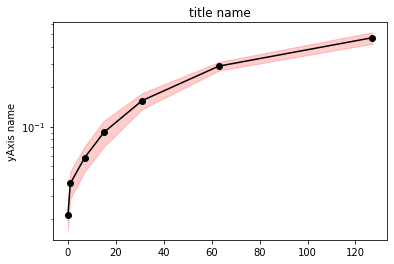

In [297]:
y_axis = np.array(all_iteration_mean)
x_axis = np.array([0,1,7,15,31,63,127])
plt.plot(x_axis,y_axis,'o-',color='Black')
plt.yscale('log')
plt.fill_between(x_axis, y_axis - all_iteration_std_div , y_axis + all_iteration_std_div, color='red', alpha=0.2)
plt.title('title name')
plt.ylabel('xAxis name')
plt.ylabel('yAxis name')
plt.show()
#Gas per payload(byte(s))

In [185]:
event_filter = contract_passingArbitraryArguments.events.NewTrade.createFilter(fromBlock=0,toBlock = 'latest',argument_filters={"_from":accounts_list[1],"to": accounts_list[2],"iteration":2})
print(event_filter.get_all_entries())

[AttributeDict({'args': AttributeDict({'_from': '0x9aD2B168758cC2b54FBE2D09065c63E1CD50c4CA', 'to': '0x430F64641A78E6eE11fd6dBAEF84137CB59C95a6', 'iteration': 2, 'amount': ['0.000153264985104455', '0.000153264985104455', '0.9945018013658761', '0.9945018013658761']}), 'event': 'NewTrade', 'logIndex': 0, 'transactionIndex': 0, 'transactionHash': HexBytes('0x3088c5104ed960a94f0be1047a3197e7a04563cca588715e87864152080f785b'), 'address': '0xdAEa05CFd300D3dc89cd4A240Cb8b4712CDdbcd2', 'blockHash': HexBytes('0x165c923bb69c8389c47311d57e93e571c74d1565110c0f48cc9f81e050415ab9'), 'blockNumber': 31})]


In [226]:
# def time_calculation(from_,to_,iteration_number):
#     start_time = time.time()
#     event_filter = contract_passingArbitraryArguments.events.NewTrade.createFilter(fromBlock=0,toBlock = 'latest',argument_filters={"_from":accounts_list[from_],"to": accounts_list[to_],"iteration":iteration_number})
#     event_filter.get_all_entries()
#     end_time = time.time()
#     return (end_time-start_time)
#     #return event_filter.get_all_entries()

# average_iteration_time_of_rounds = []
# y_max_list = []
# y_min_list = []

# #time to retrieve data (filtering:)
# for i in range(max_iteration):
#     print(i)
    
#     iter_1 = time_calculation(1,2,i)
#     print(iter_1)
#     average_of_all_grid_iteration_time.append(iter_1)
#     iter_2 = time_calculation(1,3,i)
#     print(iter_2)
#     average_of_all_grid_iteration_time.append(iter_2)
#     iter_3 = time_calculation(2,1,i)
#     print(iter_3)
#     average_of_all_grid_iteration_time.append(iter_3)
#     iter_4 = time_calculation(2,4,i)
#     print(iter_4)
#     average_of_all_grid_iteration_time.append(iter_4)
#     iter_5 = time_calculation(3,1,i)
#     print(iter_5)
#     average_of_all_grid_iteration_time.append(iter_5)
#     iter_6 = time_calculation(3,4,i)
#     print(iter_6)
#     average_of_all_grid_iteration_time.append(iter_6)
#     iter_7 = time_calculation(4,2,i)
#     print(iter_7)
#     average_of_all_grid_iteration_time.append(iter_7)
#     iter_8 = time_calculation(4,3,i)
#     print(iter_8)
#     average_of_all_grid_iteration_time.append(iter_8)
#     print()
    
#     average_time_of_iteration = (iter_1+iter_2+iter_3+iter_4+iter_5+iter_6+iter_7+iter_8)/8
#     y_max = max([iter_1,iter_2,iter_3,iter_4,iter_5,iter_6,iter_7,iter_8])
#     y_max_list.append(y_max)
#     y_min = min([iter_1,iter_2,iter_3,iter_4,iter_5,iter_6,iter_7,iter_8])
#     y_min_list.append(y_min)
    
#     print(average_time_of_iteration)
#     average_iteration_time_of_rounds.append(average_time_of_iteration)

# print(y_max_list)
# print(average_iteration_time_of_rounds)
# print(y_min_list)

#     #A1-A2
#     event_filter = contract_passingArbitraryArguments.events.NewTrade.createFilter(fromBlock=0,toBlock = 'latest',argument_filters={"_from":accounts_list[1],"to": accounts_list[2],"iteration":i})
#     print(event_filter.get_all_entries())
#     print()
#     #A1-A3
#     event_filter = contract_passingArbitraryArguments.events.NewTrade.createFilter(fromBlock=0,toBlock = 'latest',argument_filters={"_from":accounts_list[1],"to": accounts_list[3],"iteration":i})
#     print(event_filter.get_all_entries())
#     print()

#     #A2-A1
#     event_filter = contract_passingArbitraryArguments.events.NewTrade.createFilter(fromBlock=0,toBlock = 'latest',argument_filters={"_from":accounts_list[2],"to": accounts_list[1],"iteration":i})
#     print(event_filter.get_all_entries())
#     print()

#     #A2-A4
#     event_filter = contract_passingArbitraryArguments.events.NewTrade.createFilter(fromBlock=0,toBlock = 'latest',argument_filters={"_from":accounts_list[2],"to": accounts_list[4],"iteration":i})
#     print(event_filter.get_all_entries())
#     print()

#     #A3-A1
#     event_filter = contract_passingArbitraryArguments.events.NewTrade.createFilter(fromBlock=0,toBlock = 'latest',argument_filters={"_from":accounts_list[3],"to": accounts_list[1],"iteration":i})
#     print(event_filter.get_all_entries())
#     print()

#     #A3-A4
#     event_filter = contract_passingArbitraryArguments.events.NewTrade.createFilter(fromBlock=0,toBlock = 'latest',argument_filters={"_from":accounts_list[3],"to": accounts_list[4],"iteration":i})
#     print(event_filter.get_all_entries())
#     print()    

#     #A4-A2
#     event_filter = contract_passingArbitraryArguments.events.NewTrade.createFilter(fromBlock=0,toBlock = 'latest',argument_filters={"_from":accounts_list[4],"to": accounts_list[2],"iteration":i})
#     print(event_filter.get_all_entries())
#     print()

#     #A4-A3
#     event_filter = contract_passingArbitraryArguments.events.NewTrade.createFilter(fromBlock=0,toBlock = 'latest',argument_filters={"_from":accounts_list[4],"to": accounts_list[3],"iteration":i})
#     print(event_filter.get_all_entries())
#     print()